In [17]:
'''
    分析相关性？

'''
from matplotlib.font_manager import FontProperties 

import pandas as pd
from matplotlib import pyplot as plt

font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=15) 


risk_type_df_type_only = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_alarm_basic_config' + '.csv')

risk_type_id = []
risk_type_name = []

iter_num = 0

# 组合（道路偏移）
lane_offset = [132356 ,
               132358 ]
lane_offset_warning = [132355 , 132357]

seq_length_thresh = 1

# 重新赋值成的
lane_offset_uniform_id = 10000
lane_offset_warning_uniform_id = 10001

# 时间段划分间隔
time_windows = 120

risk_type_df = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_alarm_basic_config' + '.csv')

# 换名字
def return_type_name(type_id):
    '''
    @breif id->name
    '''
    if type_id == lane_offset_uniform_id:
        return "车道偏离" 
    elif type_id == lane_offset_warning_uniform_id:
        return "车道偏离预警" 
    else: 
        return risk_type_df[risk_type_df['event_type'] == type_id]['\"name\"'].values[0]

# 换id号
def return_type_id(type_name):
    '''
    @breif name->id
    '''
    if type_name == "车道偏离":
        return lane_offset_uniform_id
    elif type_name == "车道偏离预警":
        return lane_offset_warning_uniform_id
    else: 
        return risk_type_df[risk_type_df['\"name\"'] == type_name]['event_type'].values[0]


print(return_type_name(10001))
print(return_type_id("车道偏离预警"))


for i, r in risk_type_df_type_only.iterrows():
    # 换id和名字
    cur_type_id = r['event_type']
    if cur_type_id in lane_offset:
        cur_type_id = lane_offset_uniform_id
    elif cur_type_id in lane_offset_warning:
        cur_type_id = lane_offset_warning_uniform_id
        
    if cur_type_id not in risk_type_id:
        risk_type_id.append(cur_type_id)
        risk_type_name.append(return_type_name(cur_type_id))

车道偏离预警
10001


In [18]:

print(return_type_name(132355))

车道偏离（左）预警


In [19]:
import pandas as pd
# 生成警报序列段！（序列段之间的间隔为120s）
router_timestamp = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_alarm_router_timestamp_.csv')

# 时间段划分间隔
time_windows = 120

iter_num = 0

# 组合（道路偏移）
lane_offset = [132356 ,
               132358 ]
lane_offset_warning = [132355 , 132357]

seq_length_thresh = 1

# 重新赋值成的
lane_offset_uniform_id = 10000
lane_offset_warning_uniform_id = 10001

time_seq = []
new_array_timestamp = []
new_array_event_type = []

# 取出所有的router_id
router_id = router_timestamp.groupby('router_id').head(1)["router_id"].values
router_id.sort()

for index, cur_id in enumerate(router_id):
    # 遍历每一条行程
    tmp_df = router_timestamp[router_timestamp["router_id"] == cur_id]
    for i,r in tmp_df.iterrows():
        # 遍历在每一条行程内的每一个alarm
        cur_time = pd.to_datetime(r['begin_time'])
        cur_event = r['event_type']

        # 重新赋值左偏右偏
        if cur_event in lane_offset:
            cur_event = lane_offset_uniform_id
        elif cur_event in lane_offset_warning:
            cur_event = lane_offset_warning_uniform_id

        if len(new_array_timestamp) == 0:
            # 新序列的第一个
            new_array_timestamp.append(cur_time)
            new_array_event_type.append(cur_event)
        else:
            # 后续是否要加入
            delta_time = cur_time - new_array_timestamp[-1]
            
            if delta_time.total_seconds() < time_windows: 
                
                # 仍在时间段内
                last_event = new_array_event_type[-1]
                if  cur_event != last_event:
                    # 连续的去重
                    if len(time_seq) == 2027:
                        print(cur_event, delta_time.total_seconds(), cur_time, new_array_timestamp[-1])

                    new_array_timestamp.append(cur_time)
                    new_array_event_type.append(cur_event)
            else:
                # 超出时间阈值，成为新的序列
                if len(new_array_event_type) > seq_length_thresh:
                    time_seq.append((cur_id, new_array_event_type.copy()))
                
                new_array_event_type.clear()
                new_array_timestamp.clear()

        iter_num = iter_num + 1

    # if len(new_array_timestamp) > 0:
    #     last_event = new_array_event_type[-1]
    #     if cur_event != last_event:
    #         # 连续的去重
    #         new_array_timestamp.append(cur_time)
    #         new_array_event_type.append(cur_event)
    if len(new_array_timestamp) > 0:
        time_seq.append((cur_id, new_array_event_type.copy()))
        new_array_event_type.clear()
        new_array_timestamp.clear()
    
# print(time_seq[2027])
# print(tmp_df)
    
time_seq_str = []
for index, i in enumerate(time_seq):
    cur_str = ""
    # if index > 10:
    #     break
    for j in i[1]:
        cur_str += str(j) + ","
    time_seq_str.append(cur_str)



132375 100.0 2021-07-02 13:44:26 2021-07-02 13:42:46
132373 35.0 2021-07-02 13:45:01 2021-07-02 13:44:26


In [20]:
print(len(time_seq))

2176


            前向碰撞预警         前向碰撞       车道偏离预警         车道偏离       车距过近预警  \
count  2176.000000  2176.000000  2176.000000  2176.000000  2176.000000   
mean      0.030331     0.080423     0.524816     1.272978     0.206342   
std       0.176815     0.305449     0.712664     1.059571     0.491936   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     0.000000   
75%       0.000000     0.000000     1.000000     2.000000     0.000000   
max       2.000000     3.000000     5.000000    11.000000     5.000000   

              车距过近       疲劳驾驶预警         疲劳驾驶         接打电话           抽烟  \
count  2176.000000  2176.000000  2176.000000  2176.000000  2176.000000   
mean      0.806066     0.002298     0.037684     0.001838     0.010570   
std       1.030157     0.047891     0.268594     0.042845     0.102289   
min       0.000000     0.000000     0

C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_16064/2860747080.py:32: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_frequency_final_data.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task5_stastics_1.xls')


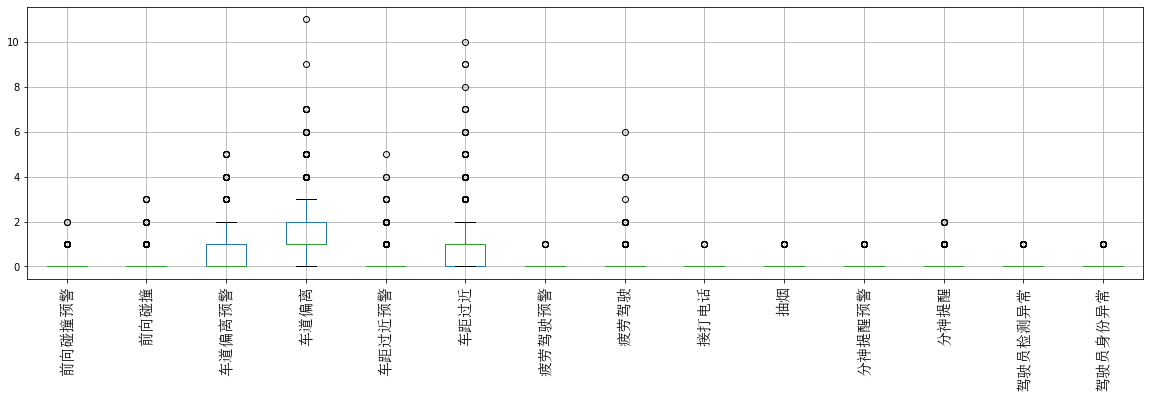

In [21]:

data_frequency = {}

for i in risk_type_name:
    data_frequency[i] = []

#
for index, record in enumerate(time_seq_str):
    for type_index, type_name in enumerate(risk_type_id):

        type_name = str(type_name)
        data_frequency[risk_type_name[type_index]].append(record.count(type_name)) # record.count(patt))

filter_data_frequency = {}
for type_index, type_name in enumerate(risk_type_name):
    if len(data_frequency[type_name]) > 0 and sum(data_frequency[type_name]) > 0:
        filter_data_frequency[type_name] = data_frequency[type_name]


# 补齐
df_frequency_final_data = pd.DataFrame.from_dict(filter_data_frequency, orient='index')
df_frequency_final_data = df_frequency_final_data[df_frequency_final_data < 20]

df_frequency_final_data = df_frequency_final_data.T

# print(df_frequency_final_data)
print(df_frequency_final_data.describe())

df_frequency_final_data.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task5_stastics_1.xls')
plt.figure(figsize=(20,5))
# 解决标注乱码的问题
ax = df_frequency_final_data.boxplot(rot='90')
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 
    




C:\Users\zhengqiushi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhengqiushi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhengqiushi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhengqiushi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25758 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhengqiushi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from c

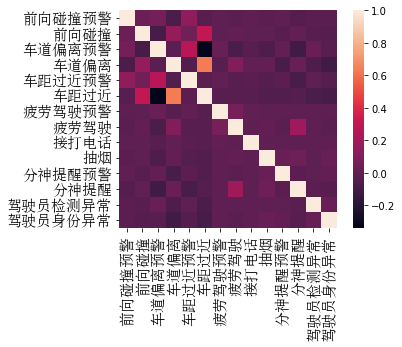

In [22]:
import seaborn as sns
import numpy as np

corrmat_pearson = df_frequency_final_data.corr()   # 计算pearson相关系数

ax = sns.heatmap(corrmat_pearson, vmax = 1, square = True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 

for label in ax.get_yticklabels() : 
    label.set_fontproperties(font) 

def sort_dataframe_content(corrmat_pearson):
    '''
    @brief 输出top_k 最高的相关系数对！
    @params corrmat_pearson 相关分析结果
    '''
    cur_values = []
    cur_vals = corrmat_pearson.values
    for i in cur_vals:
        for j in i:
            if j != 1 and ~np.isnan(j) :
                cur_values.append(j)
    # 由大到小排序
    cur_values.sort(reverse=True)

    # 只取偶数
    cur_res_val = []
    for i, val in enumerate(cur_values):
        if i % 2 == 0:
            cur_res_val.append(val)

    # 生成结果表
    ret_df = pd.DataFrame(columns=['事件A', '事件B', '相关系数'])

    for per_id, per_values in enumerate(cur_res_val):
        cur_row_num = 0
        is_find = False
        for i, r in corrmat_pearson.iterrows():
            for j, val in enumerate(r):
                if val == per_values:
                    # 生成行
                    ser_df = pd.Series([corrmat_pearson.columns[j], i, per_values])
                    ser_df.index = ['事件A', '事件B', '相关系数']

                    ret_df.loc[per_id]= [corrmat_pearson.columns[j], i, per_values]

                    corrmat_pearson.iloc[cur_row_num, j] = np.nan
                    is_find = True
                    break
            cur_row_num += 1
            if is_find == True:
                break
    return ret_df

sort_dataframe_content(corrmat_pearson).to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task_3_pearson_sort.xls')


C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_16064/305544680.py:15: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sort_dataframe_content(corrmat_pearson).to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task_3_spearman_sort.xls')


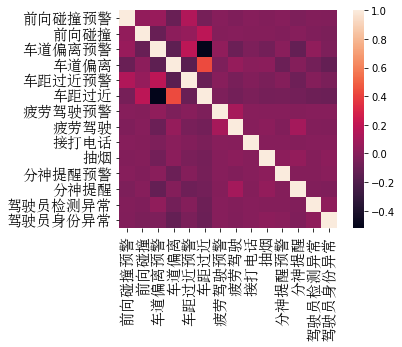

In [23]:
import seaborn as sns

corrmat_pearson = df_frequency_final_data.corr("spearman")   # 计算pearson相关系数
# plt.subplots(figsize=(12, 9))
# corrmat_pearson = corrmat_pearson[corrmat_pearson > 0.2]

ax = sns.heatmap(corrmat_pearson, vmax = 1, square = True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 

for label in ax.get_yticklabels() : 
    label.set_fontproperties(font) 


sort_dataframe_content(corrmat_pearson).to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task_3_spearman_sort.xls')


C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_16064/4180138708.py:14: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sort_dataframe_content(corrmat_pearson).to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task_3_kendall_sort.xls')


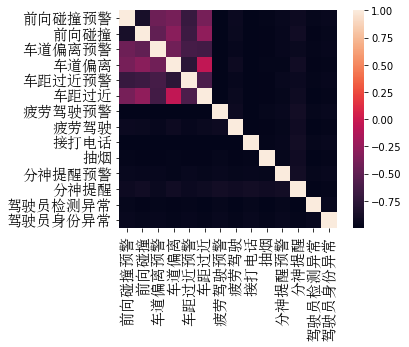

In [25]:
import seaborn as sns

corrmat_pearson = df_frequency_final_data.corr("kendall")   # 计算pearson相关系数
# plt.subplots(figsize=(12, 9))
# print(corrmat_pearson)

ax = sns.heatmap(corrmat_pearson, vmax = 1, square = True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 

for label in ax.get_yticklabels() : 
    label.set_fontproperties(font) 

sort_dataframe_content(corrmat_pearson).to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task_3_kendall_sort.xls')
# print(corrmat_pearson)


In [26]:
risk_df = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_risk_accessment_result' + '.csv')
risk_df.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_risk_accessment_result' + '.xls') 

C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_16064/1672372681.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  risk_df.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_risk_accessment_result' + '.xls')
